In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

### Loading Data

In [2]:
jobs = pd.read_csv('./data/2019-03-15_jobs.csv', header = 0)

In [4]:
rejects = pd.read_csv('./data/2019-03-15_rejects.csv', header = 0)
reject_details = pd.read_csv('./data/2019-03-15_reject_details.csv', header = 0)
rejects = reject_details.merge(rejects.rename(columns = {'id': 'reject_id'}), on = 'reject_id', how = 'left')

In [21]:
# \s(\r\n|\r|\n)+
# [^,]\"[^,\s]
# \\\"(?<=[^,\s])
# , comma in Quotes "just passing time while I wait on my digivice.lso I'm trash so there's that."Just because you're trash, doesn't mean you can't do great things. It's called a garbage can, not a garbage cannot.\" - Oscar the grouch probably,robably not."

users = pd.read_csv('./data/2019-03-15_users.csv')

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12715 entries, 0 to 12714
Data columns (total 39 columns):
user_id                   12715 non-null int64
birthday                  12590 non-null object
gender                    12715 non-null object
photo_count               12715 non-null int64
profile_score             10288 non-null float64
profile_tier              10288 non-null object
bio                       1823 non-null object
characters                3273 non-null object
height                    12467 non-null float64
body_type                 12456 non-null object
blood_type                2945 non-null object
education                 12280 non-null object
school                    1010 non-null object
job                       12427 non-null object
company                   955 non-null object
religion                  12425 non-null object
smoking                   12421 non-null object
drinking                  12424 non-null object
region                    12478 n

### Feature

In [23]:
users = users.replace('NULL', np.nan)

In [24]:
users['birthday'] = pd.to_datetime(users.birthday, errors = 'coerce')

In [25]:
users['age'] = 2019 - pd.DatetimeIndex(users.birthday).year
users.loc[users.age >= 100, 'age'] = -1
users['age'] = users.age.fillna(-1)

In [26]:
users['account_created_day'] = pd.DatetimeIndex(users.account_created_at).day
users['account_created_weekday'] = pd.DatetimeIndex(users.account_created_at).weekday
users['account_created_hour'] = pd.DatetimeIndex(users.account_created_at).hour

In [114]:
users['created_to_confirm_seconds'] = (pd.DatetimeIndex(users.admin_confirmed_at) - pd.DatetimeIndex(users.account_created_at)).seconds
users['confirm_to_complete_seconds'] = (pd.DatetimeIndex(users.stage_updated_at) - pd.DatetimeIndex(users.admin_confirmed_at)).seconds
users['confirm_to_rating_seconds'] = (pd.DatetimeIndex(users.rating_completed_at) - pd.DatetimeIndex(users.admin_confirmed_at)).seconds
users['created_to_last_activity_days'] = (pd.DatetimeIndex(users.last_activity_at) - pd.DatetimeIndex(users.account_created_at)).days

In [222]:
user_jobs_count = users.job.value_counts()
user_jobs = user_jobs_count.index

In [224]:
uncategorized_jobs = []
for count, job in zip(user_jobs_count, user_jobs):
    if job.isnumeric():
        print(jobs.loc[jobs.id == int(job), 'job_name'], count)
    else:
        uncategorized_jobs.append(job.rstrip('</job>').lstrip('<job>'))

6    학생
Name: job_name, dtype: object 2368
7    회사원
Name: job_name, dtype: object 1589
0    없음
Name: job_name, dtype: object 913
4    준비 중
Name: job_name, dtype: object 806
2    아르바이트
Name: job_name, dtype: object 791
5    프리랜서
Name: job_name, dtype: object 598
3    자영업
Name: job_name, dtype: object 444
23    교육직
Name: job_name, dtype: object 314
128    서비스직
Name: job_name, dtype: object 274
53    사무직
Name: job_name, dtype: object 266
287    의료직
Name: job_name, dtype: object 208
131    미용 서비스직
Name: job_name, dtype: object 198
33    대학생
Name: job_name, dtype: object 187
1    사업가
Name: job_name, dtype: object 187
296    간호사
Name: job_name, dtype: object 117
242    디자인 관련직
Name: job_name, dtype: object 111
241    예술 관련직
Name: job_name, dtype: object 105
291    의료 서비스직
Name: job_name, dtype: object 95
138    의류/패션 관련직
Name: job_name, dtype: object 94
29    교사
Name: job_name, dtype: object 75
8    공무원
Name: job_name, dtype: object 72
137    외식 서비스직
Name: job_name, dtype: object 72
289    의

In [227]:
sorted(uncategorized_jobs)

['(휴)학생',
 '1인 미디어',
 '7/11',
 'Admissions Counselor',
 'Aesthetician',
 'Art Director',
 'Assistant Manager',
 'Assisted Living Coach',
 'Au pair',
 'Baby sitter',
 'Babysitting',
 'Beautician',
 'Beauty',
 'Bingo clerk',
 'Business',
 'CAD',
 'CNA',
 'Cad Operator',
 'Cake Decorator',
 'Care provider',
 'Cashier',
 'Catering Manager',
 'Children’s Book Illustrator',
 'College Student- Athlete',
 'Combat Engineer',
 'Composition technician',
 'Computer Scientist',
 'Convienent store',
 'Cornell',
 'Courtesy Clerk',
 'Custodian',
 'Customer Service',
 'Customer Service Rep',
 'Customer Service Rep.',
 'Data Transcriber',
 'Daycare Teacher',
 'Deciphera',
 'Deli Clerk',
 'Disabled',
 'Dispatcher',
 'Dog Counselor',
 'English Teacher',
 'Esthetician',
 'Event Coordinator',
 'Event Specialist',
 'Expedition',
 'Fisherman',
 'Front Desk',
 'Front Desk Agent',
 'Front Desk Attendent',
 'Full-Time',
 'Golddig',
 'Gym instructor',
 'Hair dressup and makeup artist',
 'Hair stylist',
 'Hairstyl

In [37]:
reject_counts = pd.DataFrame(rejects.groupby('user_id')['reject_id'].agg(len))
reject_counts = reject_counts.rename(columns = {'reject_id': 'reject_counts'}).reset_index()

In [39]:
users = users.merge(reject_counts, how = 'left', on = 'user_id')

In [40]:
users = users.astype({'age': 'int32', 'account_created_day': 'int32', 
                      'account_created_weekday': 'int32', 'account_created_hour': 'int32'}, errors = 'ignore')

In [236]:
bio_users = users.loc[users.bio.notnull()].user_id

In [241]:
with open('bio.text', 'w') as f:
    for b in pure_profiles.loc[pure_profiles.user_id.isin(bio_users)].bio:
        f.write(str(b) + '\n')

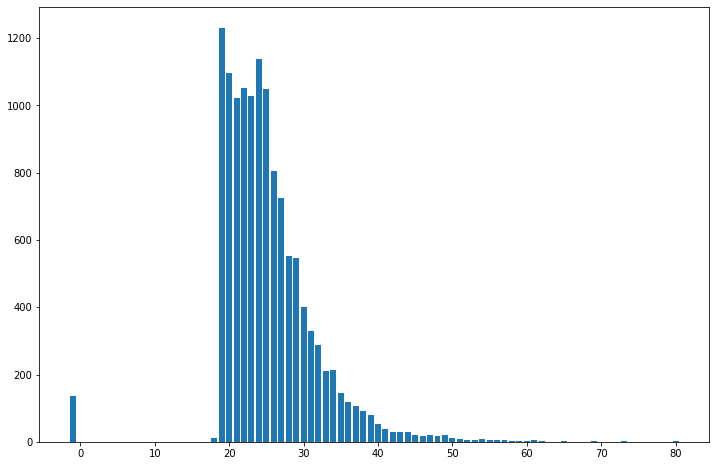

In [43]:
y = users.age.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [44]:
users.profile_score.describe()

count    10288.000000
mean        68.274002
std         12.255224
min         31.570000
25%         59.775000
50%         69.310000
75%         77.045000
max        100.000000
Name: profile_score, dtype: float64

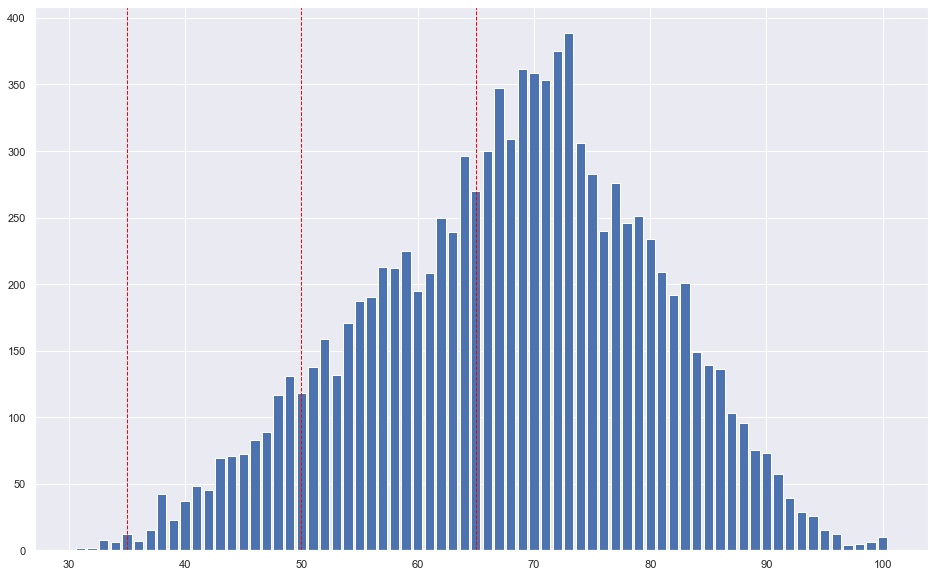

In [144]:
y = np.floor(users.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.show()

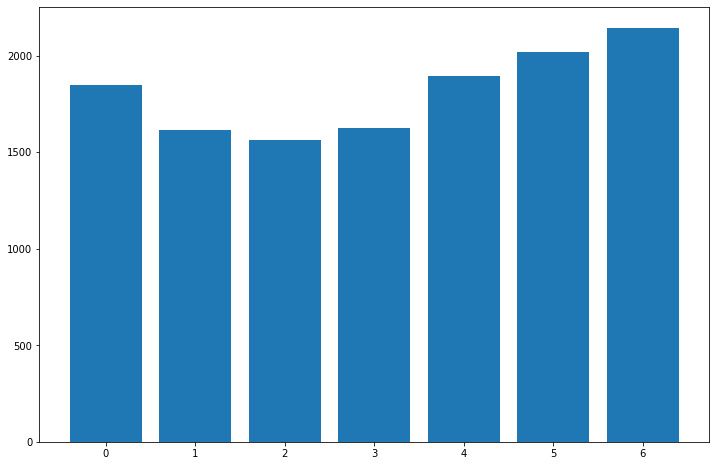

In [46]:
y = users.account_created_weekday.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [47]:
account_created_by_time = users.groupby(['account_created_weekday','account_created_hour'])['user_id'].agg(len).unstack().T
account_created_by_time.columns = ['M', 'Tu', 'W', 'Th', 'F', 'S', 'S']

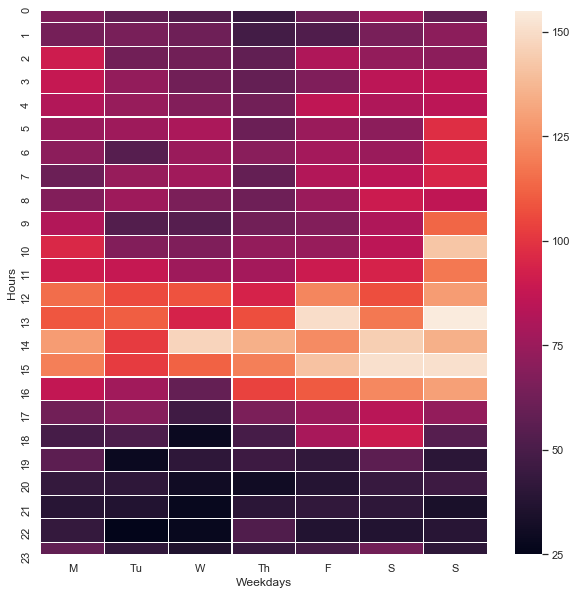

In [48]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(account_created_by_time, linewidth = 0.2)
plt.ylabel('Hours')
plt.xlabel('Weekdays')
plt.show()
plt.rcParams['figure.figsize'] = [16, 10]

In [157]:
users[['photo_count', 'profile_score', 'height', 'age', 'reject_counts']].corr()

,photo_count,profile_score,height,age,reject_counts
photo_count,1.000000,-0.009683,0.012134,-0.001761,0.110478
profile_score,-0.009683,1.000000,0.022886,0.038608,-0.074604
height,0.012134,0.022886,1.000000,0.056473,-0.013313
age,-0.001761,0.038608,0.056473,1.000000,-0.044232
reject_counts,0.110478,-0.074604,-0.013313,-0.044232,1.000000


In [263]:
rejects

,reject_id,context,user_id,admin_id,rejected_at
0,956529358,picture_0,1867729,63,2019-02-21 15:10:14
1,956529358,picture_1,1867729,63,2019-02-21 15:10:14
2,956529364,picture_0,1867747,63,2019-02-21 15:16:29
3,956529364,picture_1,1867747,63,2019-02-21 15:16:29
4,956529449,height,1867983,63,2019-02-21 17:14:05
...,...,...,...,...,...
11005,956576379,picture_0,1920150,63,2019-03-14 14:41:27
11006,956576389,picture_0,1920150,63,2019-03-14 14:51:06
11007,956576389,picture_1,1920150,63,2019-03-14 14:51:06
11008,956576388,picture_1,1920161,63,2019-03-14 14:50:56


### Users

#### Churned Profiles

In [55]:
# Churned Profile
churned_mask = (users.is_confirm.isna()) & (users.reject_counts.isna())
users.loc[churned_mask].stage.value_counts()

Picture         479
Birthday        126
Nickname         74
Location         37
MatchSetting     35
Job              26
Height           13
Body             11
Education         4
Religion          4
Drinking          3
Smoking           2
Name: stage, dtype: int64

#### On Boarding Profiles

In [56]:
# On Boarding Profile
on_boarding_mask = (users.is_confirm.isna()) & (users.reject_counts.notnull())
on_boarding_users = users.loc[on_boarding_mask]

In [57]:
rejects.loc[rejects.user_id.isin(on_boarding_users.user_id), ['context', 'reject_id']].groupby('context').agg(len).unstack()

           context         
reject_id  AMP005               273
           AMP017                22
           birthday              38
           gender                20
           height                90
           job                    6
           nickname              14
           picture_0           1189
           picture_1           1268
           picture_2            772
           picture_3            331
           picture_4            240
           picture_5            183
           single                 8
           사진도용은 가입이 불가능합니다       2
dtype: int64

#### Banned Profiles

In [284]:
pure_profiles.photo_count.value_counts()

3    2616
2    2279
6    2267
4    1585
5    1262
1       2
Name: photo_count, dtype: int64

In [58]:
# Banned Profile
banned_mask = (users.is_confirm == 'N')
banned_profiles = users.loc[banned_mask]

In [274]:
banned_users = banned_profiles.loc[banned_profiles.reject_counts > 0, 'user_id']

In [278]:
rejects.loc[rejects.user_id.isin(banned_users)].groupby('context').agg(len)

,reject_id,user_id,admin_id,rejected_at
context,,,,
AMP005,101,101,101,101
AMP017,1,1,1,1
SNS 계정 기재,1,1,1,1
birthday,5,5,5,5
height,3,3,3,3
picture_0,62,62,62,62
picture_1,84,84,84,84
picture_2,116,116,116,116
picture_3,21,21,21,21


#### Confirmed Profiles

In [59]:
# Confirmed Profile
confirmed_mask = (users.is_confirm == 'Y')
confirmed_profiles = users.loc[confirmed_mask]

In [60]:
confirmed_profiles.confirm_to_complete_seconds.describe()

count    10289.000000
mean      4842.232190
std      16569.482384
min         34.000000
25%        136.000000
50%        311.000000
75%        962.000000
max      86395.000000
Name: confirm_to_complete_seconds, dtype: float64

#### Blocked Profiles

In [61]:
# Blocked Profile
blocked_mask = (users.is_confirm == 'Y') & (users.is_blocked == 'Y') 
blocked_profiles = users.loc[blocked_mask]

In [62]:
blocked_profiles.profile_score.describe()

count    278.000000
mean      83.607878
std        6.731312
min       55.790000
25%       80.322500
50%       84.840000
75%       87.995000
max       96.640000
Name: profile_score, dtype: float64

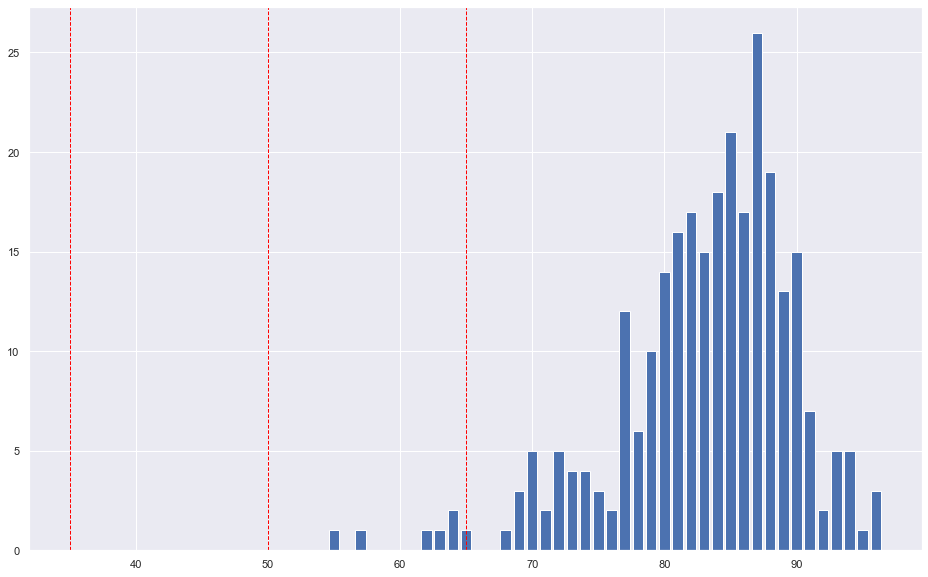

In [150]:
y = np.floor(blocked_profiles.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.show()

In [63]:
with open('blocked_bio.txt', 'w') as f:
    for text in blocked_profiles['bio'].iteritems():
        f.write(str(text) + '\n')

In [64]:
blocked_profiles.loc[blocked_profiles.bio.notnull(), 'bio']

4                     혼자사는데   저랑 술친구 밥친구 톡친구 해요  카톡T886
34                    좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~
37                        앱 자주안해서  카톡로 대화할까요 ? 카톡 :T886
69                       나이 상관없이 저랑 친구 하실분요\nㄲㅑ 똑: ttu8
71             톡 친구 밥친구 술친구 하실분  같이드라이브해도 좋아해요 카톡 :T886
                              ...                      
11645    자주 확인을 못해요  답장 늦거나   연결이 조금 늦어져도  기다려 주시면 감하행요
12405                               안녕하세요  방가워요 캐뚁 1363
12421                                   모야 이거 어떻게 하는거야ㅠ
12513                 어플 탈퇴할걸라 ㅠㅠ 친하게 지낼분은 톡1994669주세요~
12527      답장이  늦더라도    기다려 주세용  답장늦으면 카톡 199266 추가 주세용
Name: bio, Length: 62, dtype: object

#### Pure Profiles

In [115]:
pure_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna())
pure_profiles = users.loc[pure_mask]

In [116]:
pure_profiles.groupby('profile_tier')['confirm_to_rating_seconds'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,6204.0,316.668117,709.037138,30.0,65.0,94.0,377.25,20361.0
Gold,2927.0,425.669969,794.084044,31.0,70.0,121.0,689.50,18040.0
Silver,861.0,782.164925,899.068115,31.0,232.0,704.0,827.00,7824.0
Bronze,18.0,714.888889,89.089439,604.0,629.5,693.5,793.75,881.0


In [128]:
pure_profiles.groupby('account_created_hour')['confirm_to_rating_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
account_created_hour,,,,,,,,
0,338.0,605.668639,1203.437614,51.0,100.00,626.0,801.00,20361.0
1,353.0,515.614731,644.422895,59.0,89.00,200.0,775.00,5584.0
2,396.0,481.275253,955.934192,44.0,75.00,129.5,758.50,15352.0
3,407.0,466.336609,809.886018,43.0,70.00,124.0,729.00,10426.0
4,453.0,484.322296,686.242232,47.0,83.00,140.0,729.00,7610.0
5,464.0,372.409483,431.532885,42.0,79.00,117.0,705.25,2752.0
6,422.0,429.123223,652.899332,41.0,77.00,116.0,721.00,5533.0
7,413.0,471.874092,1017.876003,49.0,74.00,101.0,633.00,7877.0
8,368.0,426.665761,911.708104,37.0,73.00,98.5,660.00,6046.0


In [381]:
t = (pd.DatetimeIndex(pure_profiles.stage_updated_at) - pd.DatetimeIndex(pure_profiles.rating_completed_at)).days

In [383]:
t

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=10011)

In [385]:
sorted(t, reverse = True)

[13,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [324]:
temp = pd.DataFrame(t, columns = ['seconds'])
temp = temp.merge(pd.DataFrame(pure_profiles.profile_score).reset_index(), how = 'outer', left_index = True, right_index = True)
temp = temp.drop(['index'], axis = 1)

In [330]:
temp.corr()

,seconds,profile_score
seconds,1.000000,-0.121615
profile_score,-0.121615,1.000000


In [153]:
pure_profiles[['reject_counts', 'created_to_confirm_seconds']].corr()

,reject_counts,created_to_confirm_seconds
reject_counts,1.000000,0.128271
created_to_confirm_seconds,0.128271,1.000000


In [230]:
pure_profiles.created_to_last_activity_days.describe()

count    10011.000000
mean         3.905504
std          5.184687
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max         21.000000
Name: created_to_last_activity_days, dtype: float64

In [334]:
len(pure_profiles)

10011

In [344]:
pure_profiles.groupby('profile_tier')['created_to_last_activity_days'].describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,6204.0,4.252901,5.322127,0.0,0.0,2.0,7.0,21.0
Gold,2927.0,3.574650,5.023847,0.0,0.0,1.0,5.0,21.0
Silver,861.0,2.594657,4.404746,0.0,0.0,0.0,3.0,21.0
Bronze,18.0,0.888889,2.609685,0.0,0.0,0.0,0.0,11.0


In [345]:
tier_mask = (pure_profiles.profile_tier == 'Diamond') | (pure_profiles.profile_tier == 'Gold')
dia_gold = pure_profiles.loc[tier_mask]

In [350]:
dia_gold.profile_score.describe()

count    9131.000000
mean       70.058493
std        10.164551
min        50.000000
25%        62.515000
50%        70.160000
75%        77.230000
max       100.000000
Name: profile_score, dtype: float64

In [359]:
# new_gold = 50 - 70
new_gold = pure_profiles.loc[(pure_profiles.profile_score >= 50) & (pure_profiles.profile_score < 70.16)]
new_dia = pure_profiles.loc[pure_profiles.profile_score >= 70.16]

In [364]:
new_gold.confirm_to_rating_seconds.describe()

count     4565.000000
mean       406.657174
std        834.678926
min         30.000000
25%         68.000000
50%        110.000000
75%        670.000000
max      20361.000000
Name: confirm_to_rating_seconds, dtype: float64

In [365]:
new_dia.confirm_to_rating_seconds.describe()

count     4566.000000
mean       296.573587
std        624.399934
min         30.000000
25%         65.000000
50%         93.000000
75%        287.000000
max      15620.000000
Name: confirm_to_rating_seconds, dtype: float64

In [339]:
pure_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.619780
Gold       0.292408
Silver     0.086014
Bronze     0.001798
Name: profile_tier, dtype: float64

In [337]:
pure_profiles.loc[pure_profiles.stage_updated_at > pure_profiles.last_activity_at, 'profile_tier'].value_counts(normalize = True)

Diamond    0.406061
Gold       0.375758
Silver     0.212121
Bronze     0.006061
Name: profile_tier, dtype: float64

한국인은 bio를 안쓰는 경향이 있음(비교적)

#### Deactivated Profiles

In [136]:
deactivated_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_deactivated == 'Y')
deactivated_profiles = users.loc[deactivated_mask]

#### Turn Over Profiles

In [137]:
turn_over_mask = ((users.is_confirm == 'Y') & (users.is_blocked.isna())) & ((users.is_deactivated == 'Y') | (users.is_out == 'Y'))
turn_over_profiles = users.loc[turn_over_mask]

In [105]:
pure_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.619780
Gold       0.292408
Silver     0.086014
Bronze     0.001798
Name: profile_tier, dtype: float64

In [138]:
turn_over_profiles.profile_tier.value_counts(normalize = True)

Diamond    0.601689
Gold       0.306855
Silver     0.090156
Bronze     0.001300
Name: profile_tier, dtype: float64

#### Active Profiles

In [139]:
active_mask = (users.is_out == 'N') & (users.is_deactivated == 'N') & (users.is_confirm == 'Y') & (users.is_blocked != 'Y')
active_profiles = users.loc[active_mask]

In [140]:
active_profiles.created_to_confirm_seconds.describe()

count     3854.000000
mean      2730.092631
std      10053.708125
min        100.000000
25%        297.000000
50%        453.500000
75%        804.750000
max      86067.000000
Name: created_to_confirm_seconds, dtype: float64

In [141]:
active_profiles.reject_counts.describe()

count    813.000000
mean       3.132841
std        2.917936
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       36.000000
Name: reject_counts, dtype: float64